In [136]:
import numpy as np
import pandas as pd
data = pd.read_csv("eguitars.csv")
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

#filtered_pr['Price'] = filtered_pr['Price'].astype(float)
#filtered_pr['Price'].head()

In [137]:
data.tail()

,Brand,Year,Material,ProductLine,Model,StringConfiguration,Color,BodyType,Hand,Price
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2666.000000
3482,Paul Reed Smith,NaN,Mahogany,NaN,CE 24,6 String,NaN,CE 24,Right-Handed,2529.989990
3483,Zemaitis,NaN,NaN,NaN,Z22,NaN,NaN,NaN,NaN,790.000000
3484,Ibanez,1999.0,NaN,NaN,RG1680,6 String,Red,Solid,NaN,1200.829956
3485,FENDER JAPAN,NaN,NaN,NaN,ST57-US,6 String,NaN,NaN,Right-Handed,774.989990


Now looking at three histograms for Ibanez, Fender and Gibson

mean price: 917.218994140625
stddev : 598.3062133789062
median : 763.0


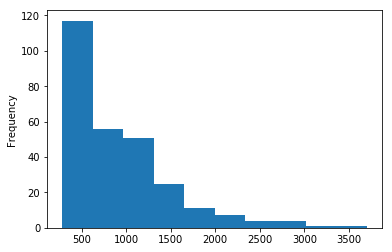

In [140]:
data[data['Brand'] == "Ibanez"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Ibanez"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Ibanez"]["Price"].std()))
print("median : " + str(data[data['Brand'] == "Ibanez"]['Price'].median()))

mean price: 1251.4603271484375
stddev : 889.9058227539062
median : 1017.47998046875


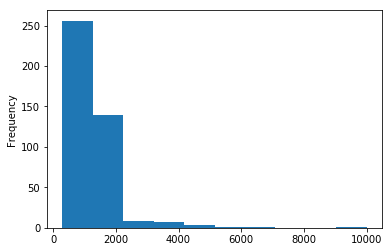

In [141]:
data[data['Brand'] == "Fender"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Fender"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Fender"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Fender"]['Price'].median()))

mean price: 1848.2763671875
stddev : 911.468017578125
median : 1681.0


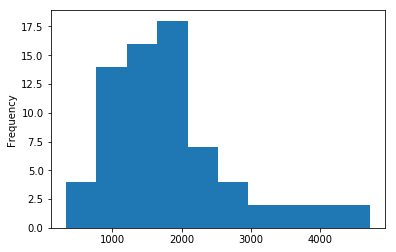

In [142]:
data[data['Brand'] == "Gibson"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Gibson"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Gibson"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Gibson"]['Price'].median()))

Now let's look at age dependence of prices

,Year,Price
Year,1.000000,-0.211912
Price,-0.211912,1.000000


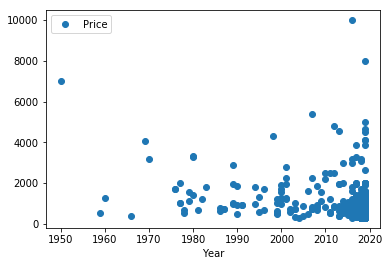

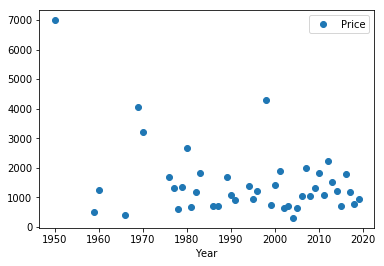

In [153]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000]
yearly.plot(x='Year',y='Price', style='o')

yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Price
Year,1.000000,-0.428341
Price,-0.428341,1.000000


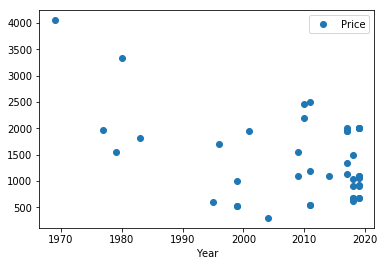

In [154]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Fender"]
yearly.plot(x='Year',y='Price', style='o')
yearly.corr(method='pearson')

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Price
Year,1.000000,-0.078433
Price,-0.078433,1.000000


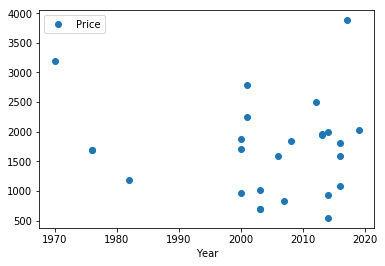

In [155]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Gibson"]
yearly.plot(x='Year',y='Price', style='o')
yearly.corr(method='pearson')

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Price
Year,1.000000,-0.145138
Price,-0.145138,1.000000


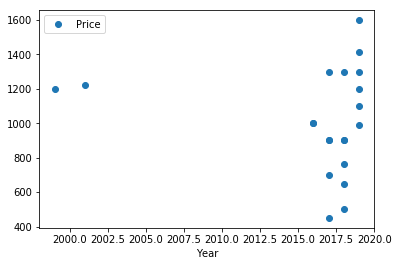

In [162]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Ibanez"]
yearly.plot(x='Year',y='Price', style='o')
yearly.corr(method='pearson')

In [146]:
brands = data.groupby('Brand').size()
brands.sort_values().tail(10)

Brand
Yamaha        65
Unbranded     68
Gibson        71
PRS          105
Dean         131
Jackson      152
ESP          175
Schecter     240
Ibanez       277
Fender       416
dtype: int64

In [161]:
bodies = data.groupby('Material').size()
bodies.sort_values().tail(10)

pr = data[data['Material'].isin(['Alder','Mahogany','Maple','Basswood','Ash'])].groupby('Material').median()
pr

,Year,Price
Material,,
Alder,2017.0,912.489990
Ash,2019.0,1294.994995
Basswood,2019.0,699.989990
Mahogany,2018.0,699.000000
Maple,2018.0,799.989990


Now let's look at some Gibsons exclusively

In [163]:
gib = pd.read_csv("gibsons.csv")
gib['Price'] = pd.to_numeric(gib['Price'], errors='coerce', downcast='float')
gib['Year'] = pd.to_numeric(gib['Year'], errors='coerce', downcast='integer')

mean price: 2973.70947265625
stddev : 2421.517822265625
median : 2000.0


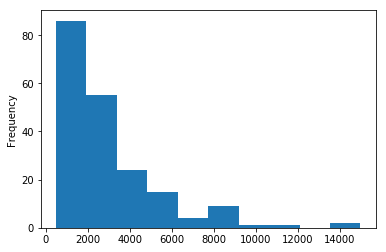

In [164]:
gib['Price'].plot.hist()
print("mean price: " + str(gib['Price'].mean()))
print("stddev : " + str(gib["Price"].std()))
print("median : " + str(gib['Price'].median()))

,Year,Price
Year,1.00000,-0.09866
Price,-0.09866,1.00000


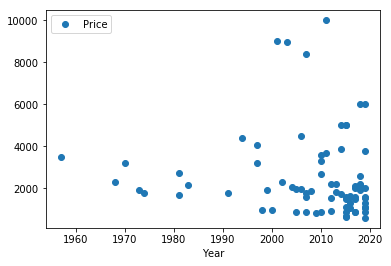

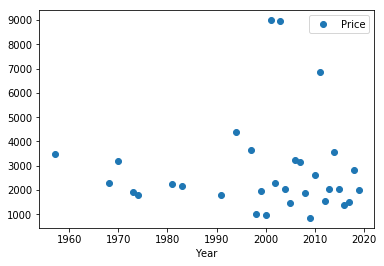

In [165]:
tmpgib = gib[gib['Year'].notnull()]
yearlygib = tmpgib[tmpgib['Price'] < 100000]
yearlygib.plot(x='Year',y='Price', style='o')

yearlygib.groupby('Year').mean().plot(style='o')
yearlygib.corr(method='pearson')